In [11]:
%reset -f
%reload_ext autoreload
%autoreload 2

import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
# === Setup ===
# Might need to change to main directory of MolFeatures
ROOT_DIR = Path().resolve().parent
print(f"Setting ROOT_DIR to: {ROOT_DIR}")
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))
os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:

    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution, add_output_column_csv
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")

# === Config ===
pd.set_option('display.max_columns', None)
examples_path=ROOT_DIR / 'Getting_started_with_examples'
os.chdir(examples_path)
    

Setting ROOT_DIR to: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures


In the next part, an example file from directory modeling_example is used, but you can pick any csv, just specify the correct path.

**Note that you need to have an output column values in order to create a model, either add manually, or in target_csv_filepath enter the location of the output csv**

Database already exists at: results_Linear_Dataset_Example.db
Table 'regression_results' has been ensured to exist.
linear model selected
Loaded CSV: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\modeling_example\Linear_Dataset_Example.csv
Names column: Unnamed: 0  |  Target column: output
Rows: 15
Features (total â kept numeric): 22 â 22


interactive(children=(FloatSlider(value=0.9, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

--- Correlation Report ---
Features with |r| > 0.8:
['-1-2-', '-2-9-']
Initial VIF (top 10):
feature      VIF
  -2-9- 3.272834
  -1-2- 3.272834

----- Independence of Errors (Durbin-Watson) -----
Durbin-Watson statistic: 0.829
â ï¸ Possible autocorrelation in residuals.

----- Homoscedasticity (Breusch-Pagan Test) -----
Breusch-Pagan p-value: 0.862
â Homoscedasticity assumed (good).

----- Normality of Errors (Shapiro-Wilk Test) -----
Shapiro-Wilk p-value: 0.364
â Residuals appear normally distributed.

----- Normality of Errors (Q-Q Plot) -----


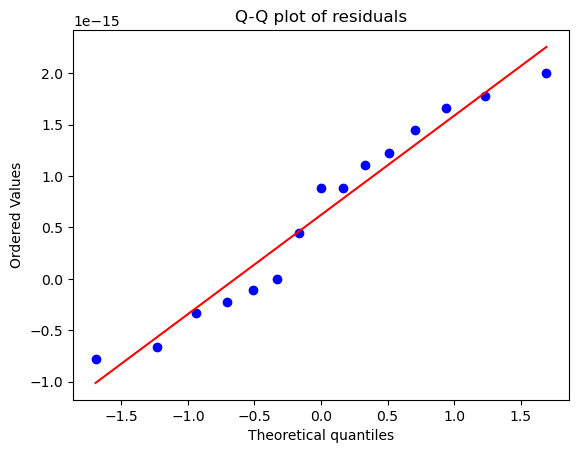

In [ ]:

modeling_example_dir = examples_path / 'modeling_example'
csv_path = modeling_example_dir / 'Linear_Dataset_Example.csv'
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
regression_model = LinearRegressionModel(csv_filepaths, process_method='one csv', y_value='output',
                                        leave_out=None, min_features_num=2,
                                        max_features_num=2, metrics=None, return_coefficients=False)


Using 1 jobs for evaluation. Found 20 cores.
Loaded 462 existing results from DB.
Combos to run: 0, done_combos: 231
No new combinations to evaluate at threshold 0.900.


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

[PDF] Saved top-5 models report to: Linear_Dataset_Example_top_models_report.pdf
| formula                    |     R.sq |     Q.sq |       MAE |   Model_id |
|:---------------------------|---------:|---------:|----------:|-----------:|
| ('Dist_1-2', 'Dist_16-17') | 0.6319   | 0.496322 | 0.0953842 |          0 |
| ('-17-18-', 'Dist_16-17')  | 0.562576 | 0.416891 | 0.11597   |          1 |
| ('-2-3-', 'Dist_16-17')    | 0.552127 | 0.393304 | 0.122832  |          2 |
| ('para', 'Dist_16-17')     | 0.626874 | 0.391091 | 0.134835  |          3 |
| ('Dist_2-3', 'Dist_16-17') | 0.56164  | 0.390795 | 0.121961  |          4 |

Model Coefficients

|             |   Estimate |   Std. Error |   t value |     p value |
|:------------|-----------:|-------------:|----------:|------------:|
| (Intercept) |  0.760256  |    0.0345025 |   22.0348 | 4.48761e-11 |
| Dist_1-2    | -0.0726808 |    0.0448371 |   -1.621  | 0.130981    |
| Dist_16-17  |  0.0998523 |    0.0448371 |    2.227  | 0.0458574   |

S

,id,combination,r2,q2,mae,rmsd,threshold,model,predictions
399,400,"('Dist_1-2', 'Dist_16-17')",0.631900,0.496322,0.095384,0.139809,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.74261605 0.85368758 0.8258459 0.76621532 0...
363,364,"('-17-18-', 'Dist_16-17')",0.562576,0.416891,0.115970,0.150430,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.78930226 0.85895124 0.89338957 0.78690881 0...
301,302,"('-2-3-', 'Dist_16-17')",0.552127,0.393304,0.122832,0.153442,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.78016569 0.85177465 0.88397326 0.77743871 0...
264,265,"('para', 'Dist_16-17')",0.626874,0.391091,0.134835,0.153722,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.74283809 0.84772915 0.87449755 0.9088889 0...
409,410,"('Dist_2-3', 'Dist_16-17')",0.561640,0.390795,0.121961,0.153759,0.4819,<modeling.LinearRegressionModel object at 0x00...,[0.77244496 0.85615089 0.87143718 0.76664967 0...


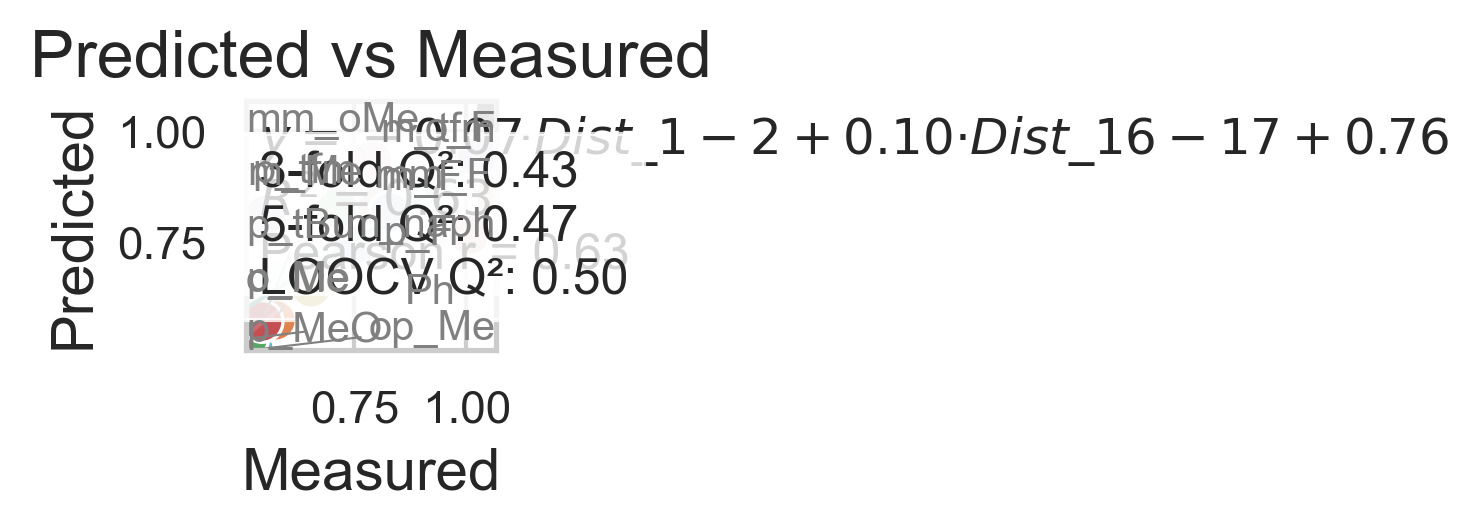

In [7]:
regression_model.search_models(top_n=5,initial_r2_threshold=0.9)

example use on a selected combination.

Extracting features from model.features_df...
Calculating cross-validation metrics for 3-fold CV...
3-fold CV metrics: Q2: 0.4339472224757472, MAE: 0.10272523313737811, RMSD: 0.1465971556768564
Calculating cross-validation metrics for 5-fold CV...
5-fold CV metrics: Q2: 0.4736767613451337, MAE: 0.09882601773308096, RMSD: 0.14249506006322546
Calculating cross-validation metrics for LOOCV...
LOOCV metrics: Q2: 0.4963223241116643, MAE: 0.09538417841599221, RMSD: 0.1398090938885087
Error: 'LinearRegressionModel' object has no attribute 'leftout_samples'
No left-out samples available; skipping result table.
Folds DataFrame prepared:
Calculating fixed margin lines and axis bounds…




VIF Table

---

| variable   |     VIF |
|:-----------|--------:|
| Dist_1-2   | 1.68878 |
| Dist_16-17 | 1.68878 |
Calculating R^2 value...
R^2 value: 0.6319, MAE: 0.0792
Retrieving coefficient estimates...
Coefficient estimates retrieved:
             Estimate  Std. Error    t value       p value
(Intercept) 

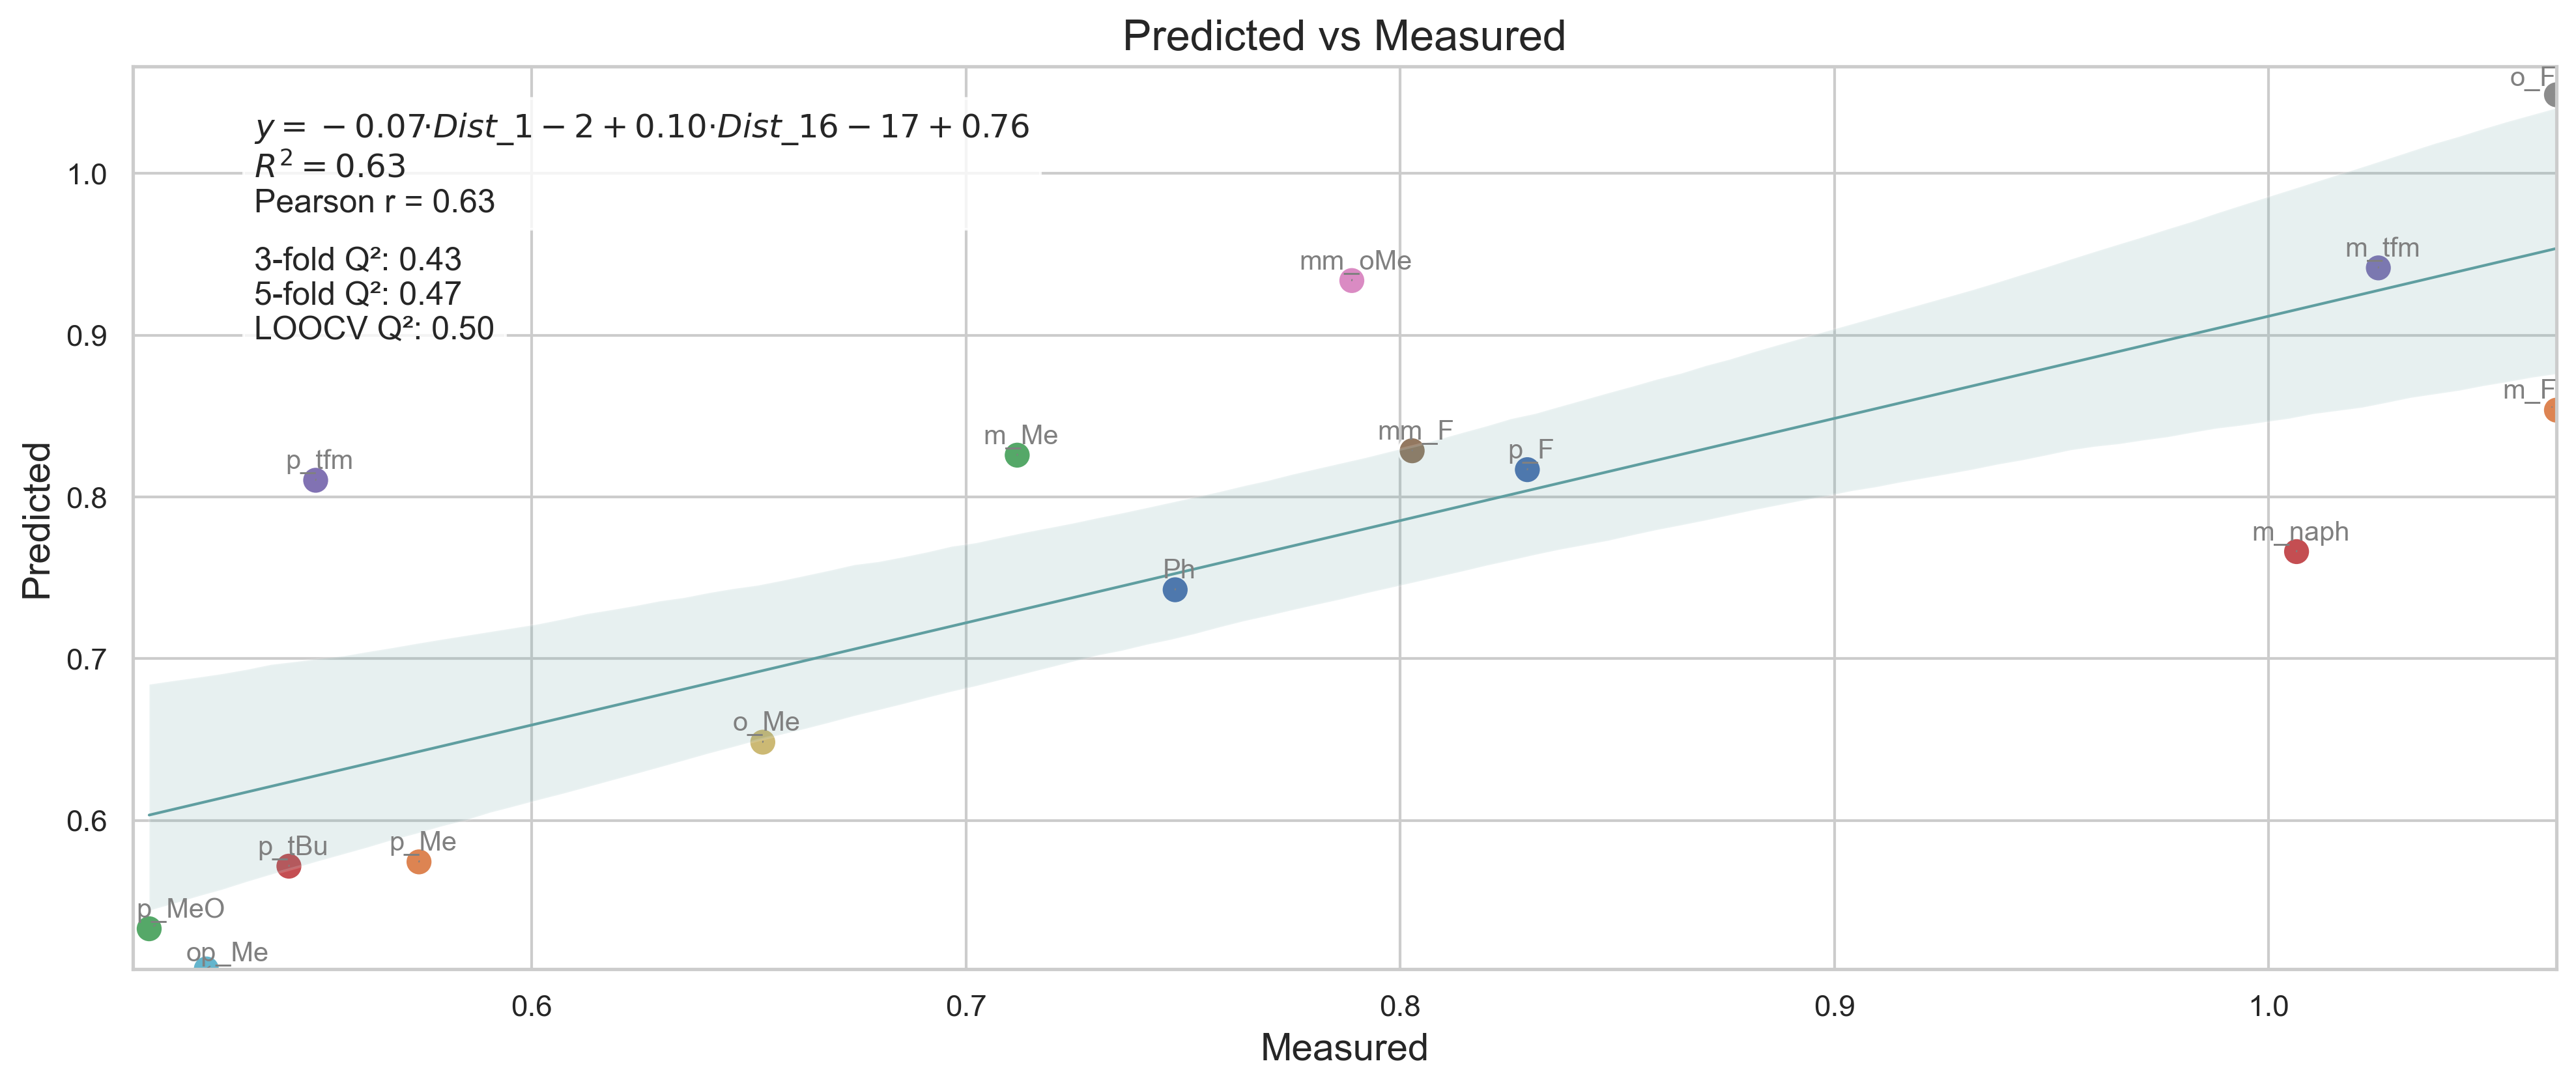

  0%|          | 0/15 [00:00<?, ?it/s]

Plot generated successfully.


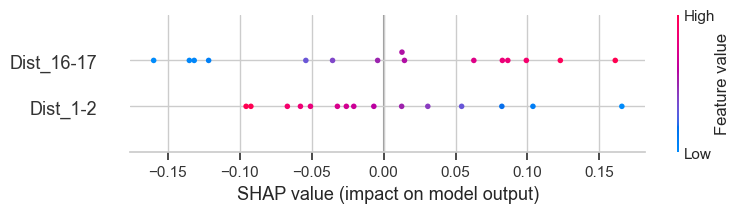

In [8]:
features=['Dist_1-2', 'Dist_16-17']
plot.generate_and_display_single_combination_plot(regression_model, features)

In [ ]:
modeling_example_dir = examples_path / 'modeling_example'
csv_path=modeling_example_dir / 'Logistic_Dataset_Example.csv'
csv_filepaths = {
'features_csv_filepath': csv_path,
'target_csv_filepath': ''
}
classification_model= ClassificationModel(csv_filepaths, process_method='one csv', y_value='class',
                                        leave_out=None, min_features_num=2,
                                        max_features_num=4, metrics=None, return_coefficients=False)


Database already exists at: results_Logistic_Dataset_Example.db
Table 'classification_results' has been ensured to exist.
Loaded CSV: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples\modeling_example\Logistic_Dataset_Example.csv
Names column: Unnamed: 0  |  Target column: class
Rows: 55
Features (total â kept numeric): 3 â 3

No features exceeded the correlation threshold.



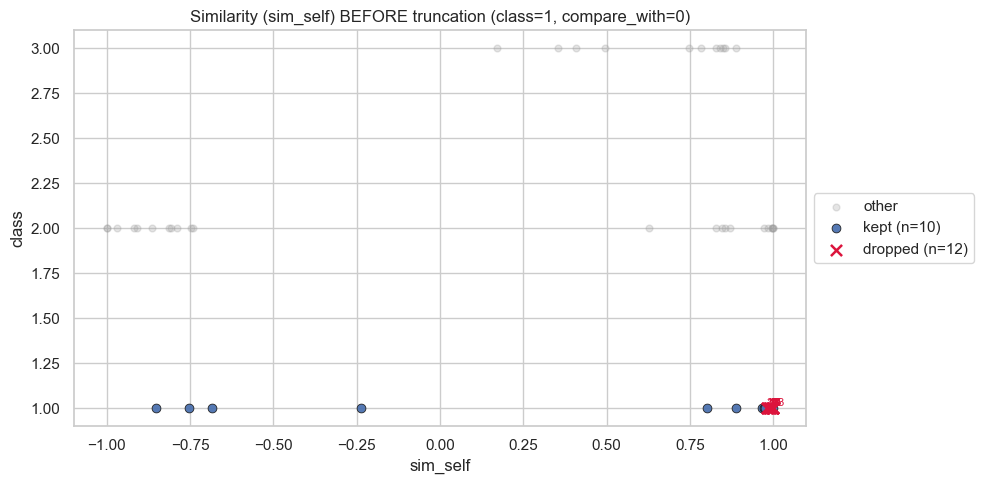

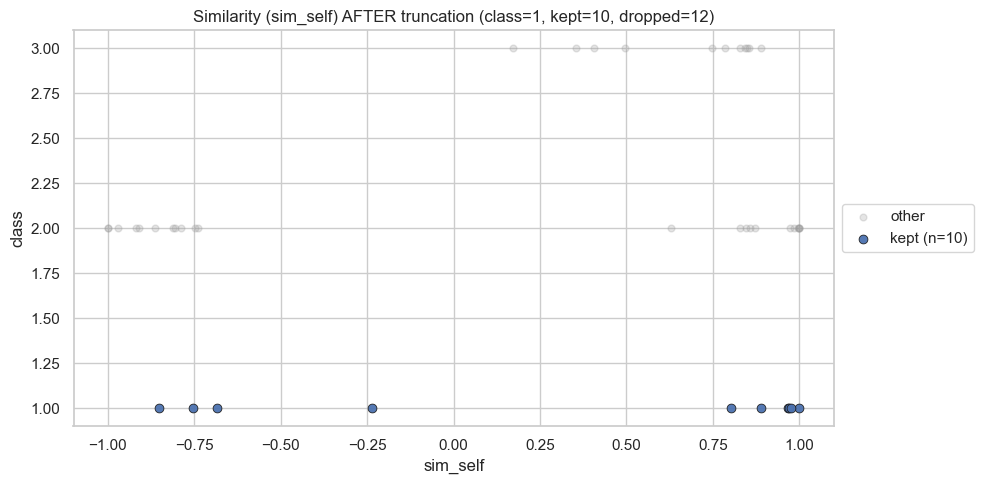


Dropped samples:
Label  sim_self  class
    3  0.980687      1
   12  0.981749      1
   10  0.985672      1
   17  0.987318      1
   14  0.991209      1
   15  0.991247      1
    1  0.995494      1
    5  0.995715      1
    2  0.999176      1
   13  0.999481      1
    4  0.999765      1
    6  0.999880      1


In [19]:
# lets use simi_sampler_ - to create a similar sample from chosen class to default class in this case 0
classification_model.simi_sampler_(class_label=1, compare_with=0, sample_size=10, plot=True)

Loaded 4 existing results from the database.
Skipping 4 combinations already in the database.
Combos to run: 0, done_combos: 4


evaluation: 0it [00:00, ?it/s]


| formula                    |   accuracy |   precision |   recall |       f1 |   mcfadden_r2 | avg_mcfadden_r2   | avg_accuracy   | avg_f1   |   Model_id |
|:---------------------------|-----------:|------------:|---------:|---------:|--------------:|:------------------|:---------------|:---------|-----------:|
| ('-2-3-', '-2-7-')         |   0.672727 |    0.670256 | 0.672727 | 0.667619 |      0.327001 |                   |                |          |          0 |
| ('flag', '-2-3-')          |   0.927273 |    0.931818 | 0.927273 | 0.927988 |    nan        |                   |                |          |          1 |
| ('flag', '-2-7-')          |   0.963636 |    0.965152 | 0.963636 | 0.96382  |    nan        |                   |                |          |          2 |
| ('flag', '-2-3-', '-2-7-') |   0.945455 |    0.947036 | 0.945455 | 0.945849 |    nan        |                   |                |          |          3 |
VIF summary:
   variables       VIF
1     -2-7-  1.146648


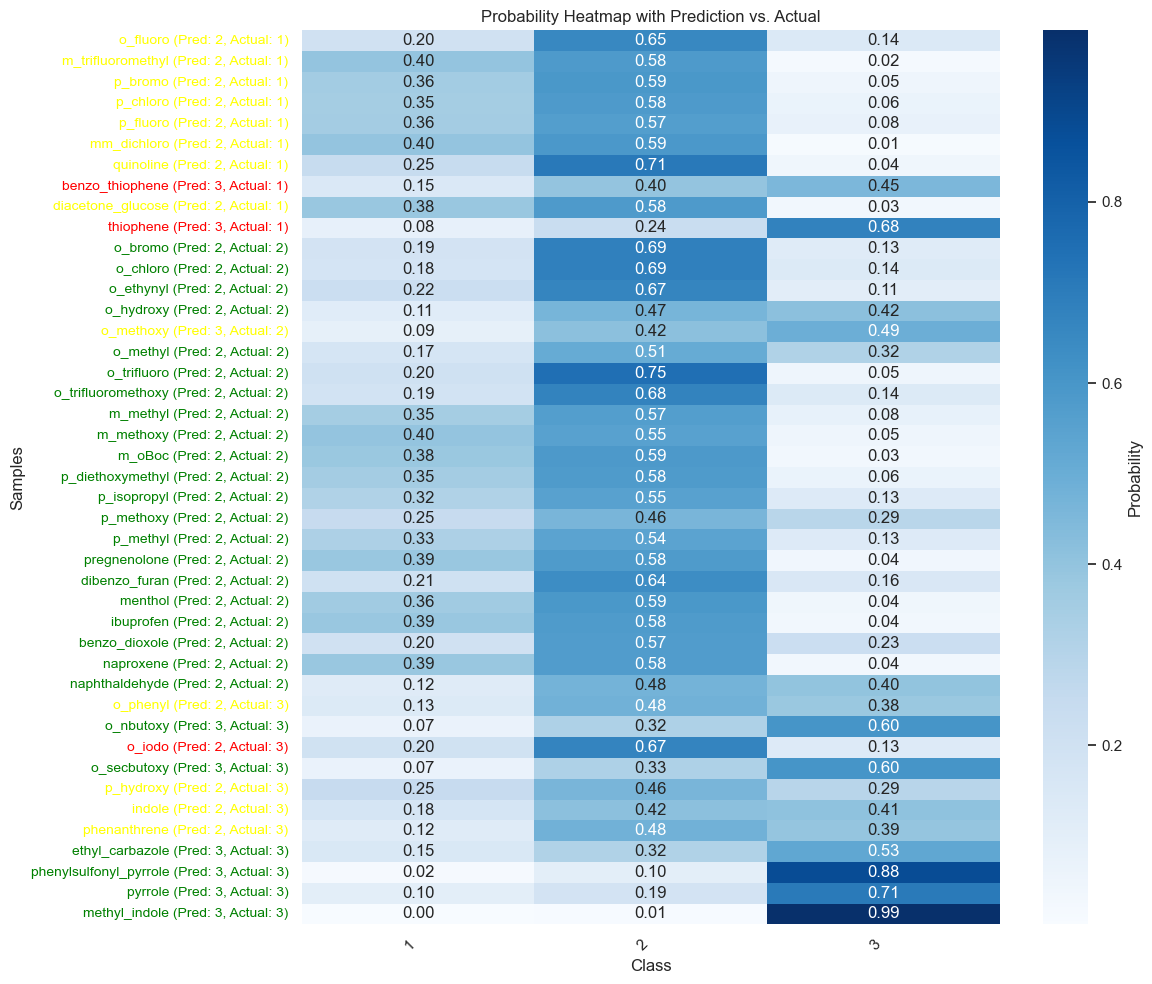





VIF Table

---

| variables   |     VIF |
|:------------|--------:|
| -2-7-       | 1.14665 |
| -2-3-       | 1.14665 |

Confusion Matrix

Results saved to classification_results.txt in C:\Users\edens\Documents\GitHub\LabCode\MolFeatures\Getting_started_with_examples


c:\Users\edens\anaconda3\envs\labenv\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



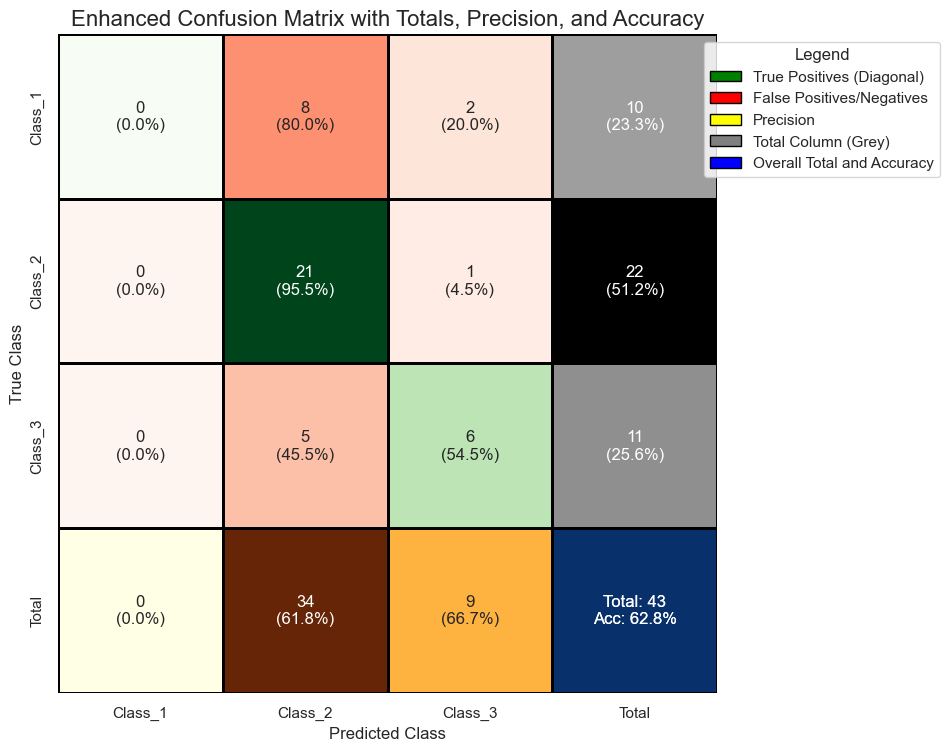

Exiting model selection.


,id,combination,accuracy,precision,recall,f1_score,mcfadden_r2,avg_mcfadden_r2,avg_accuracy,avg_f1_score,threshold
2,3,"('-2-3-', '-2-7-')",0.672727,0.670256,0.672727,0.667619,0.327001,None,None,None,0.5
0,1,"('flag', '-2-3-')",0.927273,0.931818,0.927273,0.927988,NaN,None,None,None,0.5
1,2,"('flag', '-2-7-')",0.963636,0.965152,0.963636,0.963820,NaN,None,None,None,0.5
3,4,"('flag', '-2-3-', '-2-7-')",0.945455,0.947036,0.945455,0.945849,NaN,None,None,None,0.5


In [20]:
classification_model.search_models(top_n=5,mcfadden_threshold=0.5)